In [1]:
import numpy as np
import ROOT
from array import *
import matplotlib.pyplot as plt
import math
import time

Welcome to JupyROOT 6.28/04


In [2]:
fAtm = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/atm_hA_BR_4ana.root')
fTree_atm = fAtm.Get("ana/Atm")

In [3]:
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

In [4]:
CVN_Atm = GetNpArraysFromTrees(fTree_atm,"CVN_NCScore")

In [5]:
CCNC_Atm = GetNpArraysFromTrees(fTree_atm,"CCNC")

In [6]:
CCNC_Atm.size

220573

In [7]:
CCNC_Atm[CVN_Atm>-1].size

212398

In [8]:
CCNC_Atm_wCVN = CCNC_Atm[CVN_Atm>-1]

In [9]:
CVN_b1p1_m10 = np.loadtxt('CVN_bdm_m10_b1p1_00a.txt', delimiter=' ', skiprows=1,  dtype=np.float32)
CVN_b1p5_m10 = np.loadtxt('CVN_bdm_m10_b1p5_00a.txt', delimiter=' ', skiprows=1,  dtype=np.float32)
CVN_b10_m10 = np.loadtxt('CVN_bdm_m10_b10_00a.txt', delimiter=' ', skiprows=1,  dtype=np.float32)


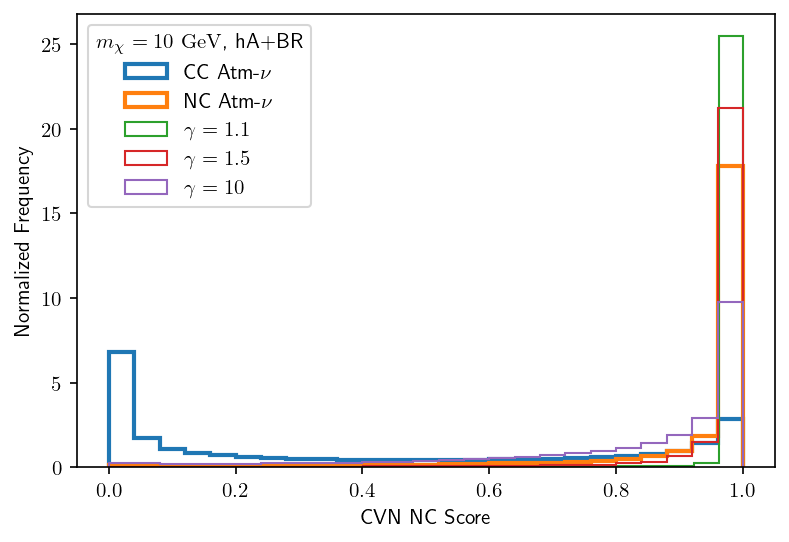

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', size=12)
plt.figure(dpi=150,figsize=(6,4))
bestCutRight = 0.995
h1, x1, _ = plt.hist(CVN_Atm[CVN_Atm>-1][CCNC_Atm_wCVN==0], bins= 25, density=True, label=r'CC Atm-$\nu$',histtype='step', lw =2)
h5, x5, _ = plt.hist(CVN_Atm[CVN_Atm>-1][CCNC_Atm_wCVN==1], bins= 25, density=True, label=r'NC Atm-$\nu$',  histtype='step',lw =2 )
h2, x2, _ = plt.hist(CVN_b1p1_m10[CVN_b1p1_m10>-1], bins= 20, density=True, label=r'$\gamma=1.1$', histtype='step', lw =1)
h3, x3, _ = plt.hist(CVN_b1p5_m10[CVN_b1p5_m10>-1], bins= 25, density=True, label=r'$\gamma=1.5$', histtype='step',lw =1)
h4, x4, _ = plt.hist(CVN_b10_m10[CVN_b10_m10>-1], bins= 25, density=True, label=r'$\gamma=10$', histtype='step',lw =1)

h = max(h1.max(),h2.max(),h3.max(), h4.max(), h5.max())
plt.xlabel('CVN NC Score')
plt.ylabel('Normalized Frequency')
plt.legend(title = r'$m_\chi=10 \textrm{ GeV}$, hA+BR',loc='upper left')
plt.savefig('cvn'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()